**sample questions part (a)**:

(a) Which fits the data better:
Sigmoid after the first linear layer
ReLU after the first linear layer
(b) Which learns faster:
Sigmoid vs ReLU, judged by error plotted as a function of steps
-  What happens if you stack Sigmoid → ReLU after the first linear?
-  What happens if you stack ReLU → Sigmoid after the first linear?
-  What happens if you have no activation after the first linear (linear-only)?

**sample questions part (b)**:
**Pick one dataset and one architecture ( [3] hidden layer width). Then**:

(a) For each optimizer (SGD, Momentum, RMS_Prop):
Use the validation set to choose hyperparameters:
- learning rate
- stopping point (# steps / early stopping)
- optimizer-specific params (e.g., momentum value, rho for RMS_Prop)

Decide which optimizer works best on your chosen dataset/architecture.
(b) Suggest another architecture you think will do better (e.g., [5], [3,3], [8], etc.).
Train & validate it after tuning.

Compare to your baseline in (a).

In [1]:
from learnProblem import Data_from_file, Evaluate   # dataset loader + metrics
from learnNN import (                              # NN + layers + optimizers + convenience builder
    NN, Linear_complete_layer, ReLU_layer, Sigmoid_layer, Dropout_layer,
    SGD, Momentum, RMS_Prop, NN_from_arch)
from learnLinear import plot_steps                  # learning-curve plotting

import random, numpy as np

data = Data_from_file('data/SPECT.csv', target_index=0)  
print("SPECT splits:", len(data.train), len(data.valid), len(data.test))


Loading data/SPECT.csv
Training set has 210 examples. Number of columns:  {23}
Test set has 27 examples. Number of columns:  {23}
Validation set has 30 examples. Number of columns:  {23}
There are 22 input features
SPECT splits: 210 30 27


In [ ]:
# 8.5 section a
#  Sigmoid variant 
random.seed(1); np.random.seed(1)           
nn_sig = NN(data, optimizer=SGD, lr=0.01)  
nn_sig.add_layer(Linear_complete_layer(nn_sig, 3))         # hidden layer with 3 units
nn_sig.add_layer(Sigmoid_layer(nn_sig))                #  hidden activation = Sigmoid
nn_sig.add_layer(Linear_complete_layer(nn_sig, 1, final_layer=True))  #output layer
print("[8.5(a)] Training: Sigmoid (SPECT)")
nn_sig.learn(batch_size=100, num_iter=1000, report_each=100)           # training loop

print("Sigmoid (SPECT):",
      "Train LL=", data.evaluate_dataset(data.train, nn_sig.predictor, Evaluate.log_loss),
      "Valid LL=", data.evaluate_dataset(data.valid, nn_sig.predictor, Evaluate.log_loss),
      "Test  LL=", data.evaluate_dataset(data.test,  nn_sig.predictor, Evaluate.log_loss),
      "Train Acc=", data.evaluate_dataset(data.train, nn_sig.predictor, Evaluate.accuracy),
      "Valid Acc=", data.evaluate_dataset(data.valid, nn_sig.predictor, Evaluate.accuracy),
      "Test  Acc=", data.evaluate_dataset(data.test,  nn_sig.predictor, Evaluate.accuracy))

#  ReLU variant (swap Sigmoid_layer -> ReLU_layer) 
random.seed(2); np.random.seed(2)
nn_relu = NN(data, optimizer=SGD, lr=0.01)
nn_relu.add_layer(Linear_complete_layer(nn_relu, 3))
nn_relu.add_layer(ReLU_layer(nn_relu))                      # hidden activation = ReLU
nn_relu.add_layer(Linear_complete_layer(nn_relu, 1, final_layer=True))
print("[8.5(a)] Training: ReLU (SPECT)")
nn_relu.learn(batch_size=100, num_iter=1000, report_each=100)

print("ReLU (SPECT):",
      "Train LL=", data.evaluate_dataset(data.train, nn_relu.predictor, Evaluate.log_loss),
      "Valid LL=", data.evaluate_dataset(data.valid, nn_relu.predictor, Evaluate.log_loss),
      "Test  LL=", data.evaluate_dataset(data.test,  nn_relu.predictor, Evaluate.log_loss),
      "Train Acc=", data.evaluate_dataset(data.train, nn_relu.predictor, Evaluate.accuracy),
      "Valid Acc=", data.evaluate_dataset(data.valid, nn_relu.predictor, Evaluate.accuracy),
      "Test  Acc=", data.evaluate_dataset(data.test,  nn_relu.predictor, Evaluate.accuracy))


NameError: name 'random' is not defined

[8.5(b)] Plotting: Sigmoid learning curve (SPECT)
Train error: 0.434212935408182 Validation error: 0.4957999314856327
[8.5(b)] Plotting: ReLU learning curve (SPECT)
Train error: 0.3871833591422125 Validation error: 0.48526393236255083


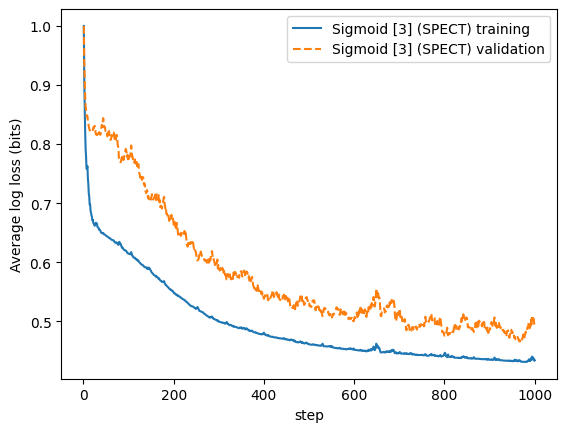

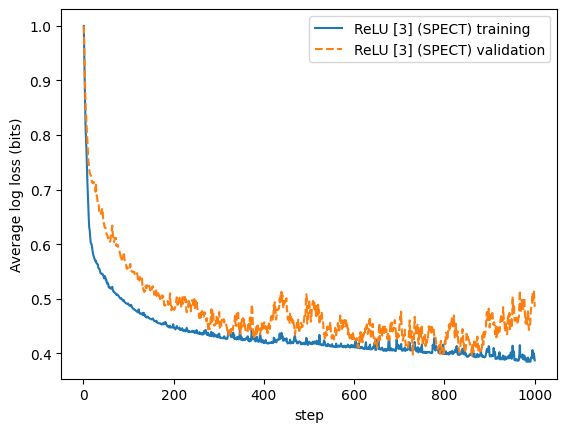

In [ ]:
# 8.5 part b
#  Sigmoid curve (FROM THE BOOK APIs)
random.seed(10); np.random.seed(10)
nn_sig_plot = NN(data, optimizer=SGD, lr=0.01)
nn_sig_plot.add_layer(Linear_complete_layer(nn_sig_plot, 3))
nn_sig_plot.add_layer(Sigmoid_layer(nn_sig_plot))
nn_sig_plot.add_layer(Linear_complete_layer(nn_sig_plot, 1, final_layer=True))
print("[8.5(b)] Plotting: Sigmoid learning curve (SPECT)")
plot_steps(data, learner=nn_sig_plot, criterion=Evaluate.log_loss,
           num_steps=1000, log_scale=False, legend_label="Sigmoid [3] (SPECT)")

#  ReLU curve 
random.seed(11); np.random.seed(11)
nn_relu_plot = NN(data, optimizer=SGD, lr=0.01)
nn_relu_plot.add_layer(Linear_complete_layer(nn_relu_plot, 3))
nn_relu_plot.add_layer(ReLU_layer(nn_relu_plot))
nn_relu_plot.add_layer(Linear_complete_layer(nn_relu_plot, 1, final_layer=True))
print("[8.5(b)] Plotting: ReLU learning curve (SPECT)")
plot_steps(data, learner=nn_relu_plot, criterion=Evaluate.log_loss,
           num_steps=1000, log_scale=False, legend_label="ReLU [3] (SPECT)")


In [4]:
# 8.5 part c
random.seed(5); np.random.seed(5)
nn_s_r = NN(data, optimizer=SGD, lr=0.01)
nn_s_r.add_layer(Linear_complete_layer(nn_s_r, 3))
nn_s_r.add_layer(Sigmoid_layer(nn_s_r))     # Sigmoid first
nn_s_r.add_layer(ReLU_layer(nn_s_r))        # then ReLU
nn_s_r.add_layer(Linear_complete_layer(nn_s_r, 1, final_layer=True))
print("[8.5(c)] Training: Sigmoid→ReLU (SPECT)")
nn_s_r.learn(batch_size=100, num_iter=1000, report_each=100)

print("Sigmoid→ReLU (SPECT):",
      "Train LL=", data.evaluate_dataset(data.train, nn_s_r.predictor, Evaluate.log_loss),
      "Valid LL=", data.evaluate_dataset(data.valid, nn_s_r.predictor, Evaluate.log_loss),
      "Test  LL=", data.evaluate_dataset(data.test,  nn_s_r.predictor, Evaluate.log_loss),
      "Train Acc=", data.evaluate_dataset(data.train, nn_s_r.predictor, Evaluate.accuracy),
      "Valid Acc=", data.evaluate_dataset(data.valid, nn_s_r.predictor, Evaluate.accuracy),
      "Test  Acc=", data.evaluate_dataset(data.test,  nn_s_r.predictor, Evaluate.accuracy))


[8.5(c)] Training: Sigmoid→ReLU (SPECT)
batch	Training	Training	Validation	Validation
	Acccuracy	Log loss	Acccuracy	Log loss
0	0.8190		1.0000		0.7333		1.0000
100	0.8190		0.5183		0.7333		0.6191
200	0.8762		0.4520		0.8333		0.5256
300	0.8762		0.4308		0.8667		0.4993
400	0.8810		0.4162		0.9000		0.4719
500	0.8762		0.4040		0.8667		0.4475
600	0.8810		0.3944		0.8667		0.4808
700	0.8952		0.3838		0.9000		0.4811
800	0.8905		0.3736		0.9000		0.4845
900	0.8905		0.3653		0.8667		0.4982
1000	0.8905		0.3575		0.8667		0.5205
Sigmoid→ReLU (SPECT): Train LL= 0.3575218407869013 Valid LL= 0.5205055074390808 Test  LL= 0.7523291370418754 Train Acc= 0.8904761904761904 Valid Acc= 0.8666666666666667 Test  Acc= 0.7407407407407407


In [5]:
#8.5 part d
random.seed(6); np.random.seed(6)
nn_r_s = NN(data, optimizer=SGD, lr=0.01)
nn_r_s.add_layer(Linear_complete_layer(nn_r_s, 3))
nn_r_s.add_layer(ReLU_layer(nn_r_s))        # ReLU first
nn_r_s.add_layer(Sigmoid_layer(nn_r_s))     # then Sigmoid
nn_r_s.add_layer(Linear_complete_layer(nn_r_s, 1, final_layer=True))
print("[8.5(d)] Training: ReLU→Sigmoid (SPECT)")
nn_r_s.learn(batch_size=100, num_iter=1000, report_each=100)

print("ReLU→Sigmoid (SPECT):",
      "Train LL=", data.evaluate_dataset(data.train, nn_r_s.predictor, Evaluate.log_loss),
      "Valid LL=", data.evaluate_dataset(data.valid, nn_r_s.predictor, Evaluate.log_loss),
      "Test  LL=", data.evaluate_dataset(data.test,  nn_r_s.predictor, Evaluate.log_loss),
      "Train Acc=", data.evaluate_dataset(data.train, nn_r_s.predictor, Evaluate.accuracy),
      "Valid Acc=", data.evaluate_dataset(data.valid, nn_r_s.predictor, Evaluate.accuracy),
      "Test  Acc=", data.evaluate_dataset(data.test,  nn_r_s.predictor, Evaluate.accuracy))


[8.5(d)] Training: ReLU→Sigmoid (SPECT)
batch	Training	Training	Validation	Validation
	Acccuracy	Log loss	Acccuracy	Log loss
0	0.8190		1.0000		0.7333		1.0000
100	0.8190		0.5768		0.7333		0.7359
200	0.8190		0.5084		0.7333		0.6380
300	0.8714		0.4691		0.8333		0.5838
400	0.8762		0.4458		0.8667		0.5564
500	0.8810		0.4292		0.8667		0.5272
600	0.8857		0.4153		0.8667		0.5311
700	0.8905		0.4019		0.9000		0.5190
800	0.8857		0.3956		0.9000		0.5134
900	0.8905		0.3844		0.9000		0.5279
1000	0.9000		0.3744		0.9000		0.5301
ReLU→Sigmoid (SPECT): Train LL= 0.3744488947742715 Valid LL= 0.530063113682314 Test  LL= 0.790918576711751 Train Acc= 0.9 Valid Acc= 0.9 Test  Acc= 0.7407407407407407


In [ ]:
#8.5 part e
random.seed(7); np.random.seed(7)
nn_lin = NN(data, optimizer=SGD, lr=0.01)
nn_lin.add_layer(Linear_complete_layer(nn_lin, 3))                    # hidden linear
# (no activation here)                                                  <-- the change
nn_lin.add_layer(Linear_complete_layer(nn_lin, 1, final_layer=True))  # output linear
print("[8.5(e)] Training: Linear-only hidden (SPECT)")
nn_lin.learn(batch_size=100, num_iter=1000, report_each=100)

print("Linear-only (SPECT):",
      "Train LL=", data.evaluate_dataset(data.train, nn_lin.predictor, Evaluate.log_loss),
      "Valid LL=", data.evaluate_dataset(data.valid, nn_lin.predictor, Evaluate.log_loss),
      "Test  LL=", data.evaluate_dataset(data.test,  nn_lin.predictor, Evaluate.log_loss),
      "Train Acc=", data.evaluate_dataset(data.train, nn_lin.predictor, Evaluate.accuracy),
      "Valid Acc=", data.evaluate_dataset(data.valid, nn_lin.predictor, Evaluate.accuracy),
      "Test  Acc=", data.evaluate_dataset(data.test,  nn_lin.predictor, Evaluate.accuracy))


[8.5(e)] Training: Linear-only hidden (SPECT)
batch	Training	Training	Validation	Validation
	Acccuracy	Log loss	Acccuracy	Log loss
0	0.8190		1.0000		0.7333		1.0000
100	0.8762		0.4338		0.9000		0.4263
200	0.8857		0.4197		0.8667		0.4125
300	0.8762		0.4214		0.9000		0.4000
400	0.8762		0.4180		0.9000		0.4195
500	0.8762		0.4279		0.8333		0.4652
600	0.8762		0.4170		0.9000		0.4316
700	0.8762		0.4158		0.8333		0.4474
800	0.8762		0.4165		0.8667		0.4305
900	0.8762		0.4294		0.9000		0.4199
1000	0.8714		0.4144		0.8667		0.4283
Linear-only (SPECT): Train LL= 0.4143707821696839 Valid LL= 0.4283110090310641 Test  LL= 0.8500913427778649 Train Acc= 0.8714285714285714 Valid Acc= 0.8666666666666667 Test  Acc= 0.7777777777777778


Exercise 8.5 — Run the same five configs on a second dataset (rerun same code above or write it out again)

In [2]:
x = 1

In [3]:
print(x)

1
